In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy
from imblearn.under_sampling import  RandomUnderSampler
from collections import Counter
from matplotlib import pyplot as plt

Import the prepared dataset and encode it into numerical values only.

In [2]:
cookie_data = pd.read_csv('./TU/Cookie_prepared.csv', sep=';', dtype='string')
print(cookie_data.info())

cookie_data_backup = cookie_data.copy()
dictionaries = {}
le = LabelEncoder()

for col in cookie_data_backup:
    # col referes to the column names   
    try:
        cookie_data[col] = pd.to_numeric(cookie_data_backup[col])
    except:
        # We have string entries we cant turn into numericals automatically -> encode!
        cookie_data[col] = le.fit_transform(cookie_data_backup[col])
        dictionaries.update({col: dict(zip(le.classes_, le.transform(le.classes_)))})

cookie_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252177 entries, 0 to 252176
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   userid_1             252177 non-null  string
 1   visitsmonth1         252177 non-null  string
 2   visitsmonth3         252177 non-null  string
 3   zipcode              252177 non-null  string
 4   carsearch            252177 non-null  string
 5   conf_start_iv4       252177 non-null  string
 6   conf_start_gulfvar   252177 non-null  string
 7   conf_start_upper     252177 non-null  string
 8   conf_start_polnew    252177 non-null  string
 9   conf_start_pol       252177 non-null  string
 10  conf_start_crossing  252177 non-null  string
 11  conf_start_golf      252177 non-null  string
 12  conf_start_croc      252177 non-null  string
 13  conf_start_tour      252177 non-null  string
 14  conf_start_tiga      252177 non-null  string
 15  conf_start_pass      252177 non-nu

,userid_1,visitsmonth1,visitsmonth3,zipcode,carsearch,conf_start_iv4,conf_start_gulfvar,conf_start_upper,conf_start_polnew,conf_start_pol,...,conf_end_pass,conf_end_art,conf_end_shar,conf_end_touar,conf_end_tig,days_since_visit,sessionsnbr,lead_general,lead_model1,lead_model2
0,1,0,0,4000,0,0,0,0,0,0,...,0,0,0,0,0,139,1,0,0,0
1,2,0,0,7673,0,0,0,0,0,0,...,0,0,0,0,0,203,1,0,0,0
2,3,0,0,5270,0,0,0,0,0,0,...,0,0,0,0,0,152,1,0,0,0
3,4,0,1,5452,0,0,0,0,0,0,...,0,0,0,0,0,43,1,0,0,0
4,5,0,0,6949,0,0,0,0,0,0,...,0,0,0,0,3,124,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252172,252250,0,0,5998,0,0,0,0,0,0,...,0,0,0,0,0,223,2,1,9,0
252173,252251,2,2,1844,0,0,0,0,0,0,...,0,0,0,0,0,5,2,1,13,0
252174,252252,0,0,1767,0,0,0,0,0,0,...,0,0,0,0,0,136,4,1,0,0
252175,252253,0,0,2738,0,0,0,0,0,0,...,0,0,0,0,0,155,4,1,26,0


We take a look at the distribution of values among 'lead_general' and notice a high imbalance.

'lead_general' distribution: {0: 248856, 1: 3321}


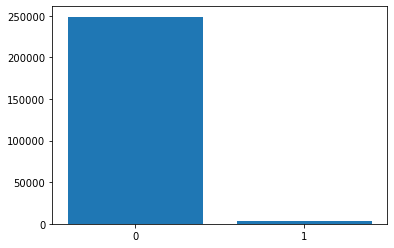

In [33]:
unique, counts = numpy.unique(cookie_data['lead_general'], return_counts=True)
print("'lead_general' distribution:", dict(zip(unique, counts)))

counter = Counter(cookie_data['lead_general'])
x,y = counter.keys(), counter.values()
plt.bar(x, y)
plt.xticks([0,1])
plt.show()

Split up the dataset into train and test sets and train the ML model with the imbalanced data.

In [3]:
cookies1 = cookie_data.iloc[0:,1:-3]
labels1 = cookie_data.iloc[0:,-3:-2]  # Gonna reshape labels into (n by 1) matrix
train_cookies, test_cookies, train_labels, test_labels = train_test_split(cookies1, labels1.values.ravel(), train_size=0.8, random_state=0)

model = RandomForestClassifier(n_jobs=-1).fit(train_cookies, train_labels)
print("Done")

Done


Evaluate the quality of the model based on an also imbalanced test set.

Test label distribution: {0: 49782, 1: 654}


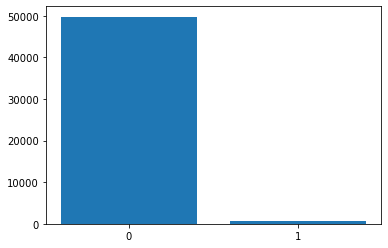

Accuracy: 0.9861210246649219
CM:
 [[49695    87]
 [  613    41]]


In [5]:
unique, counts = numpy.unique(test_labels, return_counts=True)
print("Test label distribution:", dict(zip(unique, counts)))

counter = Counter(test_labels)
x,y = counter.keys(), counter.values()
plt.bar(x, y)
plt.xticks([0,1])
plt.show()

accuracy = model.score(test_cookies, test_labels)
print("Accuracy:", accuracy)

cm = confusion_matrix(test_labels, model.predict(test_cookies))
print("CM:\n", cm)

Now assess the quality of the model based on an balanced test set.

Test label distribution (balanced): {0: 654, 1: 654}


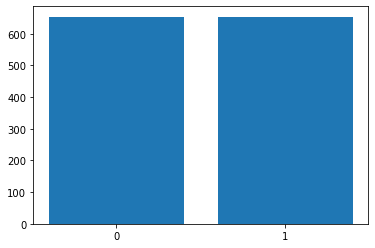

Accuracy (balanced): 0.5305810397553516
CM (balanced):
 [[653   1]
 [613  41]]


In [6]:
test_cookies_bal, test_labels_bal = RandomUnderSampler().fit_resample(test_cookies, test_labels)

unique_bal, counts_bal = numpy.unique(test_labels_bal, return_counts=True)
print("Test label distribution (balanced):", dict(zip(unique_bal, counts_bal)))

counter_bal = Counter(test_labels_bal)
x,y = counter_bal.keys(), counter_bal.values()
plt.bar(x,y)
plt.xticks([0,1])
plt.show()

accuracy_bal = model.score(test_cookies_bal, test_labels_bal)
print("Accuracy (balanced):", accuracy_bal)

cm_bal = confusion_matrix(test_labels_bal, model.predict(test_cookies_bal))
print("CM (balanced):\n", cm_bal)

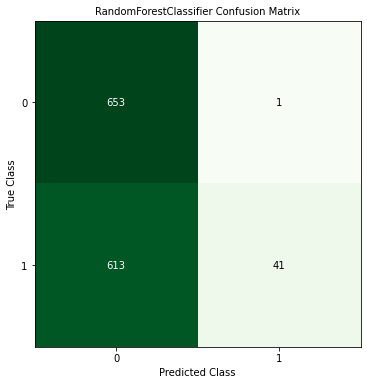

In [18]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm_bal, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('True Class', fontsize=10)
plt.title('RandomForestClassifier Confusion Matrix', fontsize=10)
plt.show()